# Floral Data Processing

# **Imports**

In [1]:
#Numpy
import numpy as np
from numpy import median

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
import plotly

#Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

#Warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading Data**

In [2]:
#Loading in the data from the previous notebook
GDS = pd.read_csv('GDS')

In [3]:
#Preview of data
GDS.head()

,Order #,Transaction Type,Order Time,Order Date,Delivery Date_x,Sender,Recipient,Product Total,Delivery_x,Nontaxable Delivery,...,Billing State,Billing Zip,Subtotal,Delivery_y,Sale Tax,Tip,Discount_y,Grand Total_y,Tax Exempt,Payment Method_y
0,100017453,Sale,03:28:16PM Sat,"Dec 29, 2018","Dec 29, 2018",Candyce Williams Glaser,NaN,$815.00,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100017452,Sale,03:16:50PM Sat,"Dec 29, 2018","Dec 29, 2018",NaN,NaN,$249.90,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100017451,Sale,02:58:53PM Sat,"Dec 29, 2018","Dec 29, 2018",NaN,NaN,$24.95,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100017450,Sale,02:54:45PM Sat,"Dec 29, 2018","Dec 29, 2018",Tracie Hamilton,NaN,$635.00,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100017202,Sale,02:48:15PM Sat,"Dec 29, 2018","Dec 23, 2018",Candyce Williams Glaser,Candyce Williams Glaser,$702.00,$0.00,$25.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Exploration**

In [4]:
#Print statement containing number of total missing values
print("There are", GDS.isna().sum().sum(), "missing values.")

There are 1879164 missing values.


In [5]:
#Looking at missing calues for each column
GDS.isna().sum()

Order #                      0
Transaction Type          5449
Order Time                5449
Order Date                5449
Delivery Date_x           5458
Sender                   24781
Recipient                30983
Product Total             5449
Delivery_x                5449
Nontaxable Delivery       5449
Wire Out Fee              5449
Discount_x                5449
Gift Cards                5449
Tax                       5449
Tips                      5449
Grand Total_x             5449
Payment Method_x          5449
Order Type                5640
Order Method              5449
Order Source             47467
Sale Date                47467
Delivery Date_y          47467
Order Status             47467
Delivery Method          47467
Product Name             47467
Item Number              52778
Card Message             47671
Card Signature           49999
Occasion                 48108
Customer Name            47467
Customer Phone           47467
Customer Email           47496
Recipien

In [6]:
#Looking at data types and null values
GDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52916 entries, 0 to 52915
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order #                52916 non-null  int64  
 1   Transaction Type       47467 non-null  object 
 2   Order Time             47467 non-null  object 
 3   Order Date             47467 non-null  object 
 4   Delivery Date_x        47458 non-null  object 
 5   Sender                 28135 non-null  object 
 6   Recipient              21933 non-null  object 
 7   Product Total          47467 non-null  object 
 8   Delivery_x             47467 non-null  object 
 9   Nontaxable Delivery    47467 non-null  object 
 10  Wire Out Fee           47467 non-null  object 
 11  Discount_x             47467 non-null  object 
 12  Gift Cards             47467 non-null  object 
 13  Tax                    47467 non-null  object 
 14  Tips                   47467 non-null  object 
 15  Gr

# **Data Cleaning**

### **Dropping unnecessary columns**

In [7]:
#Dropping unnecessary columns
#These columns do not contribute any meaningful data to the insight I am after
columns_to_drop = ['Delivery Street 2','Billing Street 2', 'Delivery_x', 'Delivery_y', 'Discount_y', 'Discount_x', 'Card Signature', 
                   'Card Message', 'Tips', 'Tip', 'Customer Email', 'Customer Phone', 'Delivery Address Type', 'Tax Exempt', 'Grand Total_y', 
                   'Item Number', 'Billing Phone', 'Delivery State', 'Delivery Date_y', 'Payment Method_y', 'Sale Tax', 'Sale Date', 'Billing Name', 
                   'Billing Street', 'Billing City', 'Billing State', 'Billing Zip', 'Recipient Phone', 'Order Status', 'Tax', 'Sender',
                   'Recipient', 'Customer Name', 'Recipient Name']
df = GDS.drop(columns_to_drop, axis= 1)
#Preview of remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52916 entries, 0 to 52915
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order #              52916 non-null  int64  
 1   Transaction Type     47467 non-null  object 
 2   Order Time           47467 non-null  object 
 3   Order Date           47467 non-null  object 
 4   Delivery Date_x      47458 non-null  object 
 5   Product Total        47467 non-null  object 
 6   Nontaxable Delivery  47467 non-null  object 
 7   Wire Out Fee         47467 non-null  object 
 8   Gift Cards           47467 non-null  object 
 9   Grand Total_x        47467 non-null  object 
 10  Payment Method_x     47467 non-null  object 
 11  Order Type           47276 non-null  object 
 12  Order Method         47467 non-null  object 
 13  Order Source         5449 non-null   object 
 14  Delivery Method      5449 non-null   object 
 15  Product Name         5449 non-null  

### **Changing Data Types**

In [8]:
import numpy as np
import pandas as pd

def change_column_datatype(df, column_dict):
    """
    Change the data type of columns in a Pandas DataFrame.

    Parameters:
    - df: Pandas DataFrame object.
    - column_dict: Dictionary specifying column names and their desired data types.
                   Key: column name (string).
                   Value: desired data type (string).
                   Example: {'column1': 'int', 'column2': 'float', 'column3': 'datetime'}
    Returns:
    - df: Updated Pandas DataFrame with changed data types.
    """
    try:
        for column, datatype in column_dict.items():
            if datatype == 'float':
                df[column] = df[column].str.replace('$', '').str.replace(',', '').str.replace('()', '')
                df[column] = df[column].apply(lambda x: float(x.replace('(', '').replace(')', '')) if isinstance(x, str) else x)
                df[column] = df[column].replace([np.inf, -np.inf], np.nan).astype(float)
            elif datatype == 'int':
                df[column] = df[column].replace(['NA', 'inf', '-inf'], np.nan).astype(float).astype(pd.Int64Dtype())
            elif datatype == 'datetime':
                df[column] = pd.to_datetime(df[column], errors='coerce')
            else:
                df[column] = df[column].astype(datatype)
        return df
    except KeyError as e:
        print(f"Error: Column '{e.args[0]}' does not exist in the DataFrame.")
    except Exception as e:
        print(f"Error: {str(e)}")

In [9]:
# Print DataFrame Before Conversion
print("Before conversion:")
print(df.dtypes)
print(df)

# Define the desired data types for columns
column_dict = {
    'Product Total': 'float',
    'Nontaxable Delivery': 'float',
    'Wire Out Fee': 'float',
    'Gift Cards': 'float',
    'Grand Total_x': 'float',
    'Order Time': 'datetime',
    'Order Date': 'datetime',
    'Delivery Date_x': 'datetime',
    'Delivery Zip': 'int',
}

# Call the function to change data types
df = change_column_datatype(df, column_dict)

# Print DataFrame After Conversion
print("\nAfter conversion:")
print(df.dtypes)
print(df)

Before conversion:
Order #                  int64
Transaction Type        object
Order Time              object
Order Date              object
Delivery Date_x         object
Product Total           object
Nontaxable Delivery     object
Wire Out Fee            object
Gift Cards              object
Grand Total_x           object
Payment Method_x        object
Order Type              object
Order Method            object
Order Source            object
Delivery Method         object
Product Name            object
Occasion                object
Delivery Street         object
Delivery City           object
Delivery Zip           float64
Subtotal               float64
dtype: object
          Order # Transaction Type      Order Time    Order Date  \
0       100017453             Sale  03:28:16PM Sat  Dec 29, 2018   
1       100017452             Sale  03:16:50PM Sat  Dec 29, 2018   
2       100017451             Sale  02:58:53PM Sat  Dec 29, 2018   
3       100017450             Sale  02:54:45

### **Unique values**

In [10]:
# Check for unique values to make sure they all make sense
unique_counts = df.nunique()
print(unique_counts)

Order #                51426
Transaction Type           3
Order Time             41876
Order Date              1683
Delivery Date_x         1724
Product Total           4419
Nontaxable Delivery      311
Wire Out Fee              39
Gift Cards                21
Grand Total_x           7999
Payment Method_x          12
Order Type                 4
Order Method               5
Order Source               4
Delivery Method            2
Product Name             535
Occasion                  37
Delivery Street         4056
Delivery City             95
Delivery Zip              35
Subtotal                 157
dtype: int64


In [11]:
df.head()

,Order #,Transaction Type,Order Time,Order Date,Delivery Date_x,Product Total,Nontaxable Delivery,Wire Out Fee,Gift Cards,Grand Total_x,...,Order Type,Order Method,Order Source,Delivery Method,Product Name,Occasion,Delivery Street,Delivery City,Delivery Zip,Subtotal
0,100017453,Sale,2023-07-22 15:28:16,2018-12-29,2018-12-29,815.00,0.0,0.0,0.0,894.46,...,Taken,Phone,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1,100017452,Sale,2023-07-22 15:16:50,2018-12-29,2018-12-29,249.90,0.0,0.0,0.0,137.13,...,Taken,Walk-In,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
2,100017451,Sale,2023-07-22 14:58:53,2018-12-29,2018-12-29,24.95,0.0,0.0,0.0,27.38,...,Taken,Walk-In,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
3,100017450,Sale,2023-07-22 14:54:45,2018-12-29,2018-12-29,635.00,0.0,0.0,0.0,696.91,...,Taken,Phone,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
4,100017202,Sale,2023-07-22 14:48:15,2018-12-29,2018-12-23,702.00,25.0,0.0,0.0,795.45,...,Delivery,Walk-In,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN


### **Replace nans function**

- The dataset had missing values in every column, necessitating the use of imputation techniques to fill in these gaps and ensure sufficient data for accurate analysis. 
- Imputation involved systematically replacing the missing values in each column with estimated or substituted values using simple imputer, ultimately creating a complete dataset suitable for further analysis.

In [12]:
def replace_nan(df):
    # Find categorical and numerical columns
    categorical_cols = df.select_dtypes(include='object').columns
    numerical_cols = df.select_dtypes(include=np.number).columns
    date_cols = ['Order Time', 'Order Date', 'Delivery Date_x']
# Replace NaT values with NaN
    df = df.replace(pd.NaT, np.nan)

# Impute missing values with mode for categorical variables
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
# Replace missing values in date columns with most frequent date
    for col in date_cols:
        most_frequent_date = df[col].mode().values[0]
        df[col].fillna(most_frequent_date, inplace=True)
        # Impute missing values with median for numerical variables
        numerical_imputer = SimpleImputer(strategy='most_frequent')
    df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

    return df

In [13]:
#Runing the function to transform the data
transformed_data =replace_nan(df)

In [14]:
#Making sure the data has been transformed
transformed_data

,Order #,Transaction Type,Order Time,Order Date,Delivery Date_x,Product Total,Nontaxable Delivery,Wire Out Fee,Gift Cards,Grand Total_x,...,Order Type,Order Method,Order Source,Delivery Method,Product Name,Occasion,Delivery Street,Delivery City,Delivery Zip,Subtotal
0,1.000175e+08,Sale,2023-07-22 15:28:16,2018-12-29,2018-12-29,815.00,0.0,0.0,0.0,894.46,...,Taken,Phone,Premium Site,Local Delivery,Vivid Daydream,Birthday,2179 Hillsboro Road,Franklin,37064.0,75.0
1,1.000175e+08,Sale,2023-07-22 15:16:50,2018-12-29,2018-12-29,249.90,0.0,0.0,0.0,137.13,...,Taken,Walk-In,Premium Site,Local Delivery,Vivid Daydream,Birthday,2179 Hillsboro Road,Franklin,37064.0,75.0
2,1.000175e+08,Sale,2023-07-22 14:58:53,2018-12-29,2018-12-29,24.95,0.0,0.0,0.0,27.38,...,Taken,Walk-In,Premium Site,Local Delivery,Vivid Daydream,Birthday,2179 Hillsboro Road,Franklin,37064.0,75.0
3,1.000174e+08,Sale,2023-07-22 14:54:45,2018-12-29,2018-12-29,635.00,0.0,0.0,0.0,696.91,...,Taken,Phone,Premium Site,Local Delivery,Vivid Daydream,Birthday,2179 Hillsboro Road,Franklin,37064.0,75.0
4,1.000172e+08,Sale,2023-07-22 14:48:15,2018-12-29,2018-12-23,702.00,25.0,0.0,0.0,795.45,...,Delivery,Walk-In,Premium Site,Local Delivery,Vivid Daydream,Birthday,2179 Hillsboro Road,Franklin,37064.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52911,2.749453e+09,Sale,2023-07-21 12:52:04,2022-04-23,2021-05-08,100.00,0.0,0.0,0.0,21.95,...,Delivery,Phone,Premium Site,Local Delivery,Blush Designer's Choice,Birthday,740 Cool Springs Blvd. Suite 200,Franklin,37067.0,135.0
52912,2.553412e+09,Sale,2023-07-21 12:52:04,2022-04-23,2021-05-08,100.00,0.0,0.0,0.0,21.95,...,Delivery,Phone,Premium Site,Local Delivery,Designer's Choice $250 - upgrade:premium,Birthday,"15000 Iron Horse Lane, Apt 15102",Franklin,37069.0,400.0
52913,3.540159e+09,Sale,2023-07-21 12:52:04,2022-04-23,2021-05-08,100.00,0.0,0.0,0.0,21.95,...,Delivery,Phone,Premium Site,Local Delivery,Honky Tonk,Birthday,3117 Tristan Drive,Franklin,37064.0,155.0
52914,3.591550e+09,Sale,2023-07-21 12:52:04,2022-04-23,2021-05-08,100.00,0.0,0.0,0.0,21.95,...,Delivery,Phone,Premium Site,Local Delivery,Vivid Daydream,Thank You,700 Cool Springs Blvd.,Franklin,37067.0,95.0


# **Creating the pipeline**

In [15]:
#Validation Split
X= transformed_data.drop(columns = 'Product Total')
y = transformed_data['Product Total']

In [16]:
#Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
#Function for pipeline creation
def create_preprocessing_pipeline(X_train, numeric_cols, categorical_cols):

#Scaler
    scaler = StandardScaler()

# Numeric pipeline
    numeric_pipe = make_pipeline(scaler)
    numeric_pipe

#OneHotEncoder
    ohe =OneHotEncoder(handle_unknown='ignore', sparse=False)

# Create the numeric and categorical pipeline
    numeric_pipe = make_pipeline(scaler)
    categorical_pipe = make_pipeline(ohe)

# Create column selectors
    num_cols_idx = np.isin(X_train.columns, numeric_cols)
    cat_cols_idx = np.isin(X_train.columns, categorical_cols)
    
# Create tuples for preprocessing the categorical and numeric columns
    num_tuple = (numeric_pipe, num_cols_idx)
    cat_tuple = (categorical_pipe, cat_cols_idx)
    
# Create the Column Transformer
    preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

# Fit the transformer
    preprocessor.fit(X_train)
    
    return preprocessor

In [18]:
#Defining columns 
numeric_cols = ['Product Total', 'Grand Total']
categorical_cols = ['Transaction Type', 'Order Type']

In [19]:
#Preprocessor creation
preprocessor = create_preprocessing_pipeline(X_train, numeric_cols, categorical_cols)

In [20]:
#Transforming x-train
X_train_preprocessed = preprocessor.transform(X_train)

In [21]:
#simplifying transformed data name
cd = transformed_data

In [22]:
#This shows us that there are rows in the data that are not sales, so we want to delete them.
cd['Transaction Type'].value_counts()

Sale          51517
Adjustment      981
Refund          418
Name: Transaction Type, dtype: int64

In [23]:
#Function to extract only sales 
import pandas as pd

def remove_adjustment_refund_rows(data):
    # Filter out rows with 'Adjustment' and 'Refund' transaction types
    filtered_data = cd[cd['Transaction Type'].isin(['Sale'])]
    
    return filtered_data

# Example usage:
filtered_data = remove_adjustment_refund_rows(transformed_data)
fd = filtered_data

In [24]:
#Checking there are only sales rows in the data
fd['Transaction Type'].value_counts()

Sale    51517
Name: Transaction Type, dtype: int64

## **Data Exploration**

This section looks into exploring irregularities within the data and how I assess them.

### **Sender/Recipient - Customer Name/Recipient Name?**

In [25]:
fd['Occasion'].value_counts()

Birthday                         47929
Sympathy and Funeral               835
Mother's Day                       502
Just Because                       405
Get Well                           398
Thank You                          295
Valentine's Day                    232
Anniversary                        222
Congrats                           193
Christmas                          101
Love and Romance                    78
New Baby                            67
I'm Sorry                           60
Easter and Passover                 45
Thanksgiving                        28
Wedding                             22
Admin Professionals' Week           21
Prom                                12
Autumn                               9
Father's Day                         9
Summer                               8
Best Friends Day                     7
Spring                               6
New Year                             6
Graduation                           6
Holiday                  

In [26]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51517 entries, 0 to 52915
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order #              51517 non-null  float64       
 1   Transaction Type     51517 non-null  object        
 2   Order Time           51517 non-null  datetime64[ns]
 3   Order Date           51517 non-null  datetime64[ns]
 4   Delivery Date_x      51517 non-null  datetime64[ns]
 5   Product Total        51517 non-null  float64       
 6   Nontaxable Delivery  51517 non-null  float64       
 7   Wire Out Fee         51517 non-null  float64       
 8   Gift Cards           51517 non-null  float64       
 9   Grand Total_x        51517 non-null  float64       
 10  Payment Method_x     51517 non-null  object        
 11  Order Type           51517 non-null  object        
 12  Order Method         51517 non-null  object        
 13  Order Source         51517 non-

### **Payment Method**

In [27]:
fd['Payment Method_x'].value_counts()

Credit Card                           41489
Bloomnation                            6252
Cash                                   1942
CFS                                     919
FSN                                     251
Check / Money order                     249
BBROOKS                                 161
Donation                                145
External Processor (Not Floranext)       60
Write Off                                32
Gift Certificate                         16
Wire Service                              1
Name: Payment Method_x, dtype: int64

### **Sale Date**

### **Order method, type & source** 

In [28]:
#Compare to order source to verify there are no duplicates 
fd['Order Method'].value_counts()

Phone                            29031
Walk-In                          21849
Subscription / Standing Order      320
Website                            281
Florist-to-Florist                  36
Name: Order Method, dtype: int64

In [29]:
#Compare to order method to verify there are no duplicates 
fd['Order Source'].value_counts()

Premium Site    51324
Marketplace       160
F2F                29
Yelp                4
Name: Order Source, dtype: int64

In [30]:
# Identify what the difference is in these last three columns ^^^
fd['Order Type'].value_counts()

Delivery    25364
Taken       19686
Pickup       5240
Wire Out     1227
Name: Order Type, dtype: int64

### **Delivery Date**

In [31]:
fd['Delivery Date_x'].value_counts()

2021-05-08    5685
2022-05-07     214
2023-02-14     208
2019-05-11     200
2023-05-13     196
              ... 
2022-05-29       1
2018-04-08       1
2017-12-22       1
2022-11-13       1
2018-06-10       1
Name: Delivery Date_x, Length: 1722, dtype: int64

### **Delivery Street**

In [32]:
# Looking further into the sales data for locating the most popular delivery street.
#The shop is located on Hilsboro Road, so it makes sense that its the most popular delivery street.
fd['Delivery Street'].value_counts()

2179 Hillsboro Road      46309
3009 Columbia Ave           22
689 Legends Crest Dr.       21
3117 Tristan Drive          19
1007 Boxwood Drive          18
                         ...  
112 Drake act.               1
414 Stable Drive             1
4105B Lone Oak Rd            1
4205 Cassie Court            1
1824 Thornbrook Lane         1
Name: Delivery Street, Length: 4056, dtype: int64

### **Non-taxable Delivery Compaired to Delivery Zip/Street**

In [33]:
#Figure out what the amounts represent
fd['Nontaxable Delivery'].value_counts()

0.00     30462
12.00     6662
15.00     5074
17.95     2437
16.95     1094
         ...  
9.95         1
45.40        1
12.30        1
46.99        1
11.49        1
Name: Nontaxable Delivery, Length: 282, dtype: int64

### **Product Name**

In [34]:
#This will help to identify the most frequently ordered products
fd['Product Name'].value_counts()

Vivid Daydream                                                                  46348
Designer's Choice  75                                                             194
Mimi’s Rose Garden: Pretty in Pink Edition                                        128
Blush Designer's Choice                                                           122
CARNTON Hydrangea Cluster in white                                                121
                                                                                ...  
Mini poinsettias in Barnwood - upgrade:deluxe|Mini poinsettias in Barnwood          1
RED BIRD WINTER                                                                     1
Blush Designer's Choice - upgrade:deluxe|Peony Gathering  (Colors will vary)        1
Joy - Fall - upgrade:deluxe|Joy - Fall                                              1
Designer's Choice $250 - upgrade:premium                                            1
Name: Product Name, Length: 535, dtype: int64

In [35]:
#Identifying duplicates
duplicates = fd.duplicated(keep='first') 
num_duplicates = duplicates.sum()
print('Number of duplicate rows:', num_duplicates)

#Print the duplicated rows
duplicate_rows = fd[duplicates]
print('Duplicate rows:')
print(duplicate_rows)

#Drop the identified duplicate rows
fd = fd.drop_duplicates(keep='first')

Number of duplicate rows: 6
Duplicate rows:
           Order # Transaction Type          Order Time Order Date  \
3690   100013681.0             Sale 2023-07-21 13:54:08 2018-07-13   
14356  100019111.0             Sale 2023-07-21 15:25:54 2019-03-15   
17756  100031715.0             Sale 2023-07-24 14:50:07 2020-11-02   
37552  100048548.0             Sale 2023-07-24 10:45:29 2022-07-25   
45732  100055178.0             Sale 2023-07-21 12:52:04 2023-03-10   
45733  100055178.0             Sale 2023-07-21 12:52:04 2023-03-10   

      Delivery Date_x  Product Total  Nontaxable Delivery  Wire Out Fee  \
3690       2018-07-18          41.00                 5.00           0.0   
14356      2019-03-15          50.75                 0.00           0.0   
17756      2020-11-06         250.00                 8.98           0.0   
37552      2022-07-26         615.98                 8.98           0.0   
45732      2023-03-10          41.67                 4.27           0.0   
45733      2023

In [36]:
#Confiriming there are no duplicates remaining
duplicates = fd.duplicated(keep='first') 
num_duplicates = duplicates.sum()
print('Number of duplicate rows:', num_duplicates)
duplicate_rows = fd[duplicates]
print('Duplicate rows:')
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Order #, Transaction Type, Order Time, Order Date, Delivery Date_x, Product Total, Nontaxable Delivery, Wire Out Fee, Gift Cards, Grand Total_x, Payment Method_x, Order Type, Order Method, Order Source, Delivery Method, Product Name, Occasion, Delivery Street, Delivery City, Delivery Zip, Subtotal]
Index: []

[0 rows x 21 columns]


In [37]:
#Looking at overview of data
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51511 entries, 0 to 52915
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order #              51511 non-null  float64       
 1   Transaction Type     51511 non-null  object        
 2   Order Time           51511 non-null  datetime64[ns]
 3   Order Date           51511 non-null  datetime64[ns]
 4   Delivery Date_x      51511 non-null  datetime64[ns]
 5   Product Total        51511 non-null  float64       
 6   Nontaxable Delivery  51511 non-null  float64       
 7   Wire Out Fee         51511 non-null  float64       
 8   Gift Cards           51511 non-null  float64       
 9   Grand Total_x        51511 non-null  float64       
 10  Payment Method_x     51511 non-null  object        
 11  Order Type           51511 non-null  object        
 12  Order Method         51511 non-null  object        
 13  Order Source         51511 non-

### **Zip**

In [38]:
#This column should be changed in the future to whatever method used for geospatial viz
# Looking at the delivery zip for insight about what are the most popular zip codes for the shop
# We know from this that 37064 is by very far the most popular zipcode for obvious reasons
# We now want to look at other surrounding zip codes that may be in close competition
#Then visualize the comparison of the results for futher analysis
fd['Delivery Zip'].value_counts()

37064.0    47552
37069.0     1403
37027.0      720
37067.0      714
37215.0      204
37221.0      170
37205.0      164
37204.0       79
37203.0       70
37209.0       59
37211.0       55
37212.0       53
37220.0       39
37013.0       31
37075.0       26
37207.0       17
37216.0       15
37206.0       15
37174.0       14
37076.0       13
37122.0       13
37214.0       12
37208.0       12
37138.0        9
37210.0        9
37217.0        8
37072.0        6
37228.0        6
37065.0        6
37219.0        5
37179.0        5
37218.0        3
37201.0        2
37213.0        1
37202.0        1
Name: Delivery Zip, dtype: int64

## **Visualizations**

- From the above print out we see there are two significantly more popular zip codes compared to the rest of the data. 37064 & 37069 (47,558 & 1403 respectively). 
- I'm choosing to visualize the other zip codes except these two, and zip codes with less than five occurrences as they contribute little insight to exploring the most popular surrounding zip codes.

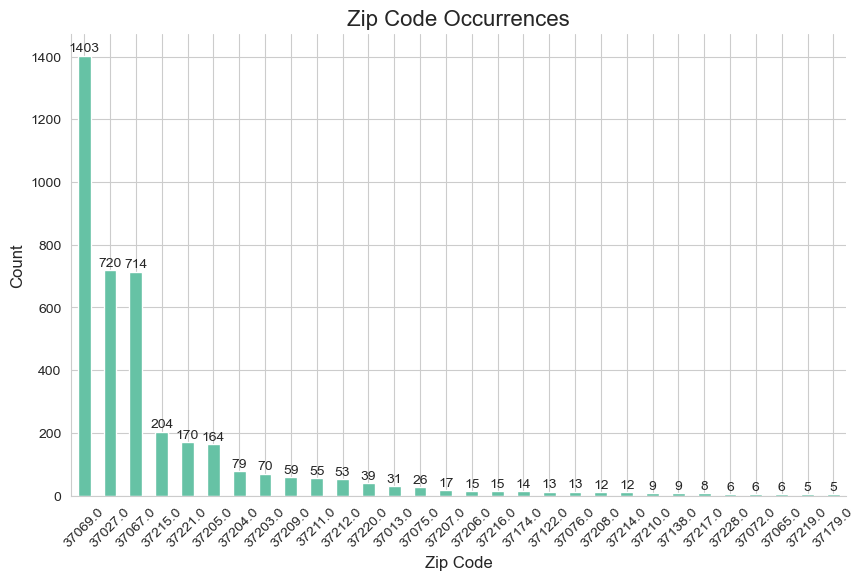

In [39]:
# Count the occurrences of each zip code
zip_code_counts = fd['Delivery Zip'].value_counts()

# Get the zip codes with less than five occurrences
zip_codes_to_remove = zip_code_counts[(zip_code_counts < 5) | (zip_code_counts > 30000)].index# Set the style and color palette
# Filter the DataFrame to exclude zip codes with less than five occurrences
filtered_zip_data = fd[~fd['Delivery Zip'].isin(zip_codes_to_remove)]
sns.set_style('whitegrid')
sns.set_palette('Set2')

# Create a larger figure size
plt.figure(figsize=(10, 6))
# Plot the data
ax = filtered_zip_data['Delivery Zip'].value_counts().plot(kind='bar')
# Customize the plot
ax.set_title('Zip Code Occurrences', fontsize=16)
ax.set_xlabel('Zip Code', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', labelrotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Add labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points', fontsize=10)
# Save the plot as an image file
plt.savefig('zip_code_occurrences.png', bbox_inches='tight')

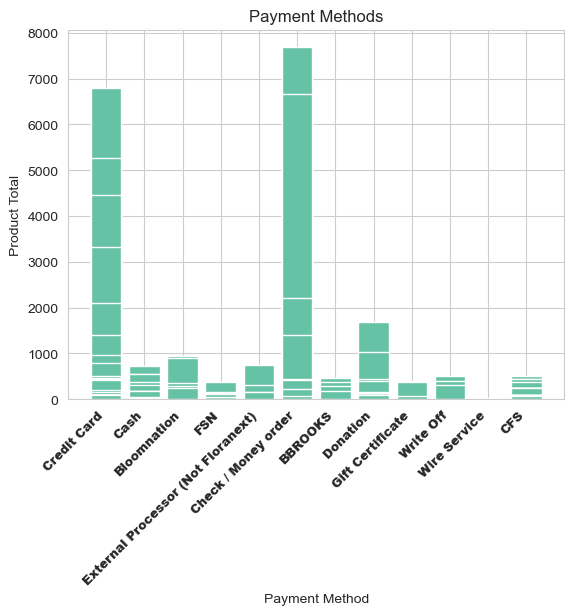

In [40]:
# Create barplot
plt.bar(fd['Payment Method_x'], fd['Product Total'])

# Set plot labels and title
plt.xlabel('Payment Method')
plt.ylabel('Product Total')
plt.xticks(rotation=45, fontsize = 9, fontweight = 'heavy', ha = 'right');
plt.title('Payment Methods')

# Show the plot
plt.show()

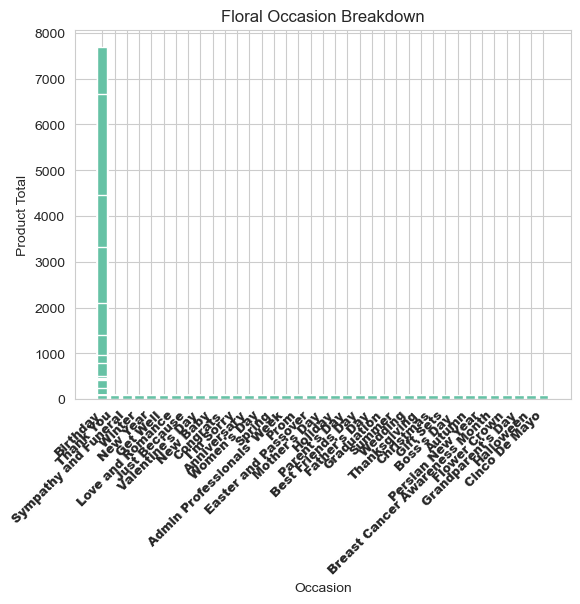

In [41]:
# Create barplot
plt.bar(fd['Occasion'], fd['Product Total'])

# Set plot labels and title
plt.xlabel('Occasion')
plt.ylabel('Product Total')
plt.xticks(rotation=45, fontsize = 9, fontweight = 'heavy', ha = 'right');
plt.title('Floral Occasion Breakdown')

# Show the plot
plt.show()

In [42]:
fd['Occasion'].value_counts()

Birthday                         47923
Sympathy and Funeral               835
Mother's Day                       502
Just Because                       405
Get Well                           398
Thank You                          295
Valentine's Day                    232
Anniversary                        222
Congrats                           193
Christmas                          101
Love and Romance                    78
New Baby                            67
I'm Sorry                           60
Easter and Passover                 45
Thanksgiving                        28
Wedding                             22
Admin Professionals' Week           21
Prom                                12
Autumn                               9
Father's Day                         9
Summer                               8
Best Friends Day                     7
Spring                               6
New Year                             6
Graduation                           6
Holiday                  

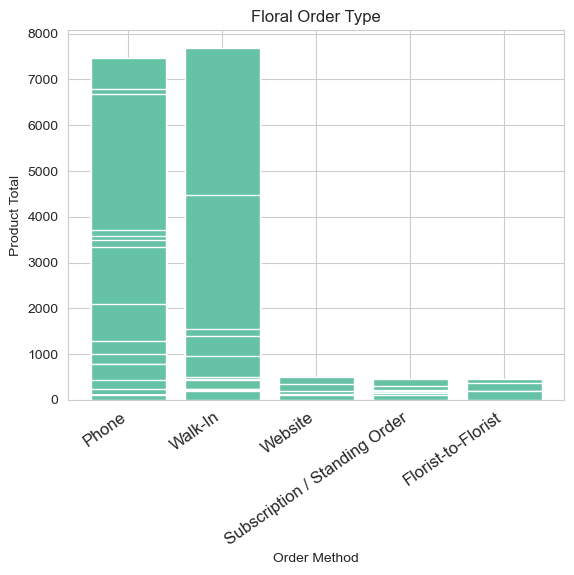

In [43]:
# Create barplot of order methods
plt.bar(fd['Order Method'], fd['Product Total'])

# Set plot labels and title
plt.xlabel('Order Method')
plt.ylabel('Product Total')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Floral Order Type')

# Show the plot
plt.show()

In [44]:
#Saving the new dataframe to upload in the next notebook
fd.to_csv('fd', index=False)